In [21]:
pip install cmocean

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install gsw

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import griddata  # Importo griddata
import cmocean #colori per oceanografia
import gsw

#definition of the file path
file_path = "C:/Users/Marta/Desktop/PS118_phys_oce1.tab"

#load the data 
df3 = pd.read_csv(file_path, skiprows=40795, nrows=10477, sep='\t')
#data contains the oceanographic data in table form 

#rename the columns
df3.columns = ['Event', 'Date/Time', 'Latitude', 'Longitude', 'Elevation_m', 
               'Depth_m', 'Pressure_dbar',
               'Temperature_C', 'Conductivity_mS_cm', 'Salinity', 'Tpot_C', 
               'Sigma_theta', 'O2', 'O2_sat', 'Attenuation', 'Fluorometer', 'NOBS']

#columns_to_drop contains the names of the last 3 columns i want to remove
columns_to_drop = df3.columns[-3:]

data = df3.drop(columns=columns_to_drop)
#data is updated. Last 3 columns ahve been excluded

#convert the "Date/Time" column to datetime format
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

#create separate "Date" and "Time" columns
data['Date'] = data['Date/Time'].dt.date
data['Time'] = data['Date/Time'].dt.time

#drop the original "Date/Time" column if not needed
data = data.drop(columns=['Date/Time'])

#reorder columns to place 'Date' and 'Time' after 'Event'
data = data[['Event', 'Date', 'Time', 'Latitude', 'Longitude', 'Elevation_m', 
             'Depth_m', 'Pressure_dbar', 'Temperature_C', 'Conductivity_mS_cm', 
             'Salinity', 'Tpot_C', 'Sigma_theta', 'O2', 'O2_sat']]

In [4]:
# Start of T-S Plotting Code 
# extract data for plotting
salinity = data['Salinity'].values
tpot = data['Tpot_C'].values
O2 = data['O2'].values
p = data['Pressure_dbar'].values
lon = data['Longitude'].values
lat = data['Latitude'].values

SA = gsw.conversions.SA_from_SP(salinity, p=p, lon=lon, lat=lat)
CT = gsw.conversions.CT_from_pt(SA, tpot)

# define axis ranges for the plot
sa_min = SA.min() - 1
sa_max = SA.max() + 1
ct_min = CT.min() - 1
ct_max = CT.max() + 1

# Calculate how many gridcells we need in the x and y dimensions
xdim = int(np.ceil(sa_max - sa_min) / 0.1)
ydim = int(np.ceil(ct_max - ct_min))
sigma_theta = np.zeros((int(ydim), int(xdim)))
 
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(0, ydim, ydim)+ct_min
si = np.linspace(1, xdim, xdim)*0.1+sa_min

for j in range(0, int(ydim)):
    for i in range(0, int(xdim)):
        sigma_theta[j,i]=gsw.sigma0(si[i], ti[j])

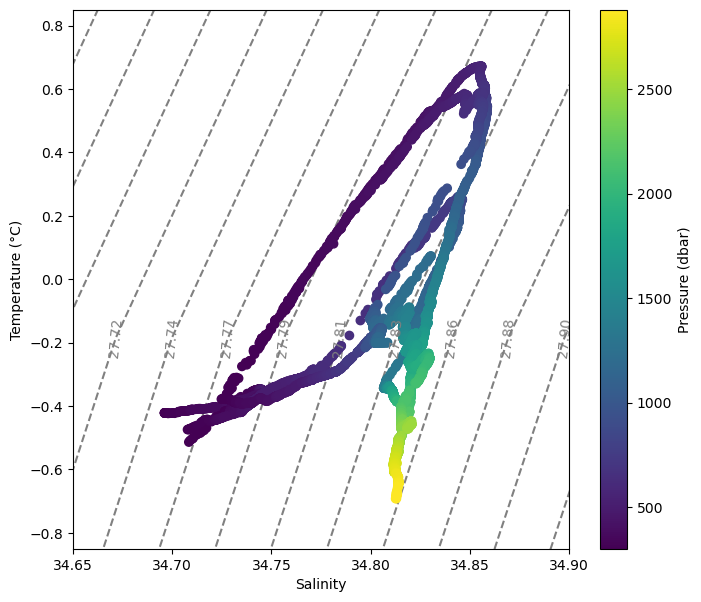

In [6]:
#T-S diagram
#pressure
fig, ax = plt.subplots(figsize=(8, 7))

num_levels = 150

cs = ax.contour(si, ti, sigma_theta, levels=np.linspace(sigma_theta.min(), sigma_theta.max(), num_levels), linestyles='dashed', zorder=1, colors='grey')
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%0.2f')

plt.scatter(SA[p>300], CT[p>300], c=p[p>300], cmap=plt.cm.viridis)
ax.set_xlim(34.65, 34.9)
ax.set_ylim(-0.85, 0.85)

cb = plt.colorbar(ax=ax)
cb.set_label('Pressure (dbar)')

ax.set_xlabel('Salinity')
ax.set_ylabel('Temperature (°C)')

plt.show()

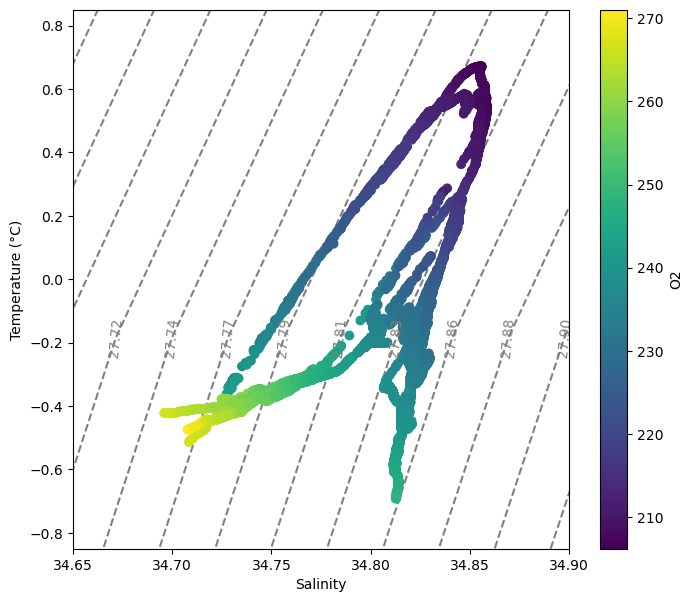

In [8]:
#T-S diagram
#O2
fig, ax = plt.subplots(figsize=(8, 7))

num_levels = 150

cs = ax.contour(si, ti, sigma_theta, levels=np.linspace(sigma_theta.min(), sigma_theta.max(), num_levels), linestyles='dashed', zorder=1, colors='grey')
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%0.2f')

plt.scatter(SA[p>300], CT[p>300], c=O2[p>300], cmap=plt.cm.viridis)
ax.set_xlim(34.65, 34.9)
ax.set_ylim(-0.85, 0.85)

cb = plt.colorbar(ax=ax)
cb.set_label('O2')

ax.set_xlabel('Salinity')
ax.set_ylabel('Temperature (°C)')

plt.show()